# Domácí úkol
## Část 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

**Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže pomocí `%timeit` a různých výsledných velikostí matic (např. 101, 1001, 10001).**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
! pip install numpy
! pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 11.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 4.2 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 11.3 MB/s eta 0:00:00a 0:00:01


In [4]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    
    
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_col += 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [5]:
A = integer_spiral(7)
print(A)

[[37. 36. 35. 34. 33. 32. 31.]
 [38. 17. 16. 15. 14. 13. 30.]
 [39. 18.  5.  4.  3. 12. 29.]
 [40. 19.  6.  1.  2. 11. 28.]
 [41. 20.  7.  8.  9. 10. 27.]
 [42. 21. 22. 23. 24. 25. 26.]
 [43. 44. 45. 46. 47. 48. 49.]]


In [9]:

def integer_spiral_numpy(n):
    if n % 2 == 0:
        print("Error number is even")
        n += 1

    A = np.zeros((n + 2, n + 2), dtype=int)
    center = n // 2 + 1
    current = 1

    A[center, center] = current
    current += 1

    for r in range(1, (n // 2) + 1):
        x, y = center - r, center + r
        bottom = x + 2 * r

        # Right (up)
        A[bottom-1:x-1:-1, y] = np.arange(current, current + 2 * r)
        current += 2 * r

        # Top (left)
        A[x, y-1:y-2*r-1:-1] = np.arange(current, current + 2 * r)
        current += 2 * r

        # Left (down)
        A[x+1:bottom+1, y - 2*r] = np.arange(current, current + 2 * r)
        current += 2 * r

        # Bottom (right)
        A[bottom, y - 2*r + 1:y + 1] = np.arange(current, current + 2 * r)
        current += 2 * r

    return A[1:-1, 1:-1]


A = integer_spiral_numpy(7)
print(A)

[[37 36 35 34 33 32 31]
 [38 17 16 15 14 13 30]
 [39 18  5  4  3 12 29]
 [40 19  6  1  2 11 28]
 [41 20  7  8  9 10 27]
 [42 21 22 23 24 25 26]
 [43 44 45 46 47 48 49]]


In [10]:
# TODO otestujte rychlost obou implementací

import timeit
sizes = [101,1001,10001]
for n in sizes: 
    print(f'\nmatrix sizes : {n} x{n}')
    time1 = timeit.timeit(lambda: integer_spiral(n), number=3)
    print(f'if else metode: {time1:.5f} seconds')
    time2 = timeit.timeit(lambda: integer_spiral_numpy(n), number=3)
    print(f'numpy metode: {time2:.5f} seconds')


matrix sizes : 101 x101
if else metode: 0.01603 seconds
numpy metode: 0.00288 seconds

matrix sizes : 1001 x1001
if else metode: 1.34169 seconds
numpy metode: 0.00865 seconds

matrix sizes : 10001 x10001
if else metode: 136.79657 seconds
numpy metode: 1.97186 seconds


## Část 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
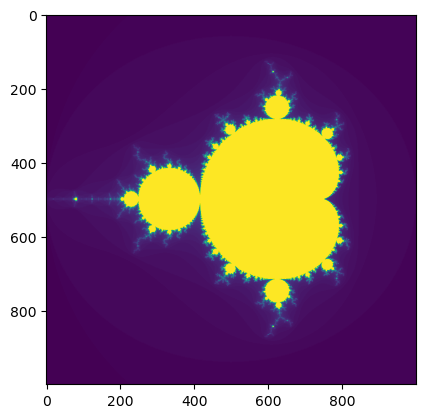

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, v kolikáté iteraci $k$ se stalo, že $|z_i| > 2$ (jakmile toto nastane jednou, už to bude platit pro všechna $n > i$)
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [11]:

def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    # TODO naimplementujte viz zadání
    real, imag = np.meshgrid(
        np.linspace(x_min, x_max, n),
        np.linspace(y_min, y_max, n)
    )
    c = real + 1j * imag

    z = np.zeros_like(c)
    divergence_matrix = np.zeros(c.shape, dtype=int)

    for i in range(1, k + 1):
        z = z**2 + c
        mask = (np.abs(z) > 2) & (divergence_matrix == 0)
        divergence_matrix[mask] = i

    return divergence_matrix
    

/tmp/ipykernel_406/3999818358.py:13: RuntimeWarning: overflow encountered in square
  z = z**2 + c
/tmp/ipykernel_406/3999818358.py:13: RuntimeWarning: invalid value encountered in square
  z = z**2 + c


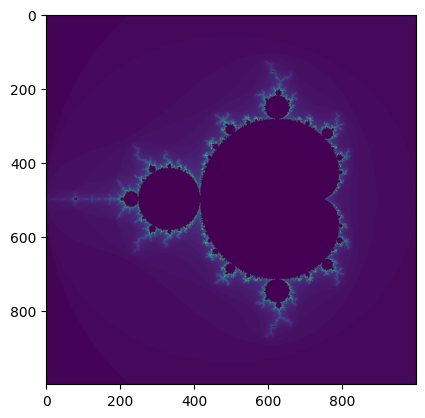

In [12]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix)

# Bonus
1. Vykreslete také Juliovu množinu (viz. https://en.wikipedia.org/wiki/Julia_set)
2. Použijte váš kód pro číselnou spirálu a vytvořte obrázek prvočíselné spirály (viz. https://en.wikipedia.org/wiki/Ulam_spiral).

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def julia_set(x_min=-2, x_max=1, y_min=-1.5, y_max=1.5, n=1000, k=100, c=-0.7 + 0.27015j):
  
    x, y = np.mgrid[x_min:x_max:n*1j, y_min:y_max:n*1j]
    z = x + 1j * y  
    divergence_matrix = np.zeros(z.shape, dtype=int)

    for i in range(k):
        z = z**2 + c
        mask = (np.abs(z) > 2) & (divergence_matrix == 0) 
        divergence_matrix[mask] = i
    return divergence_matrix



/tmp/ipykernel_406/3622733780.py:11: RuntimeWarning: overflow encountered in square
  z = z**2 + c
/tmp/ipykernel_406/3622733780.py:11: RuntimeWarning: invalid value encountered in square
  z = z**2 + c


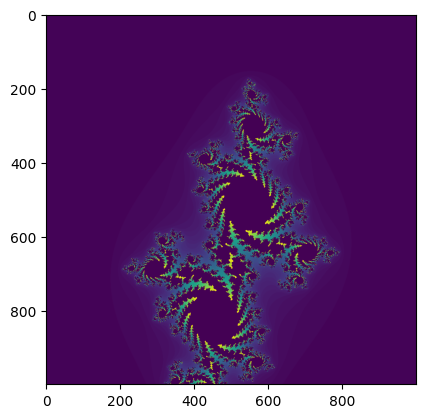

In [14]:
divergence_matrix = julia_set()
plt.imshow(divergence_matrix)
plt.show()